# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = './train.p'
testing_file = './test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = [32, 32, 3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np 

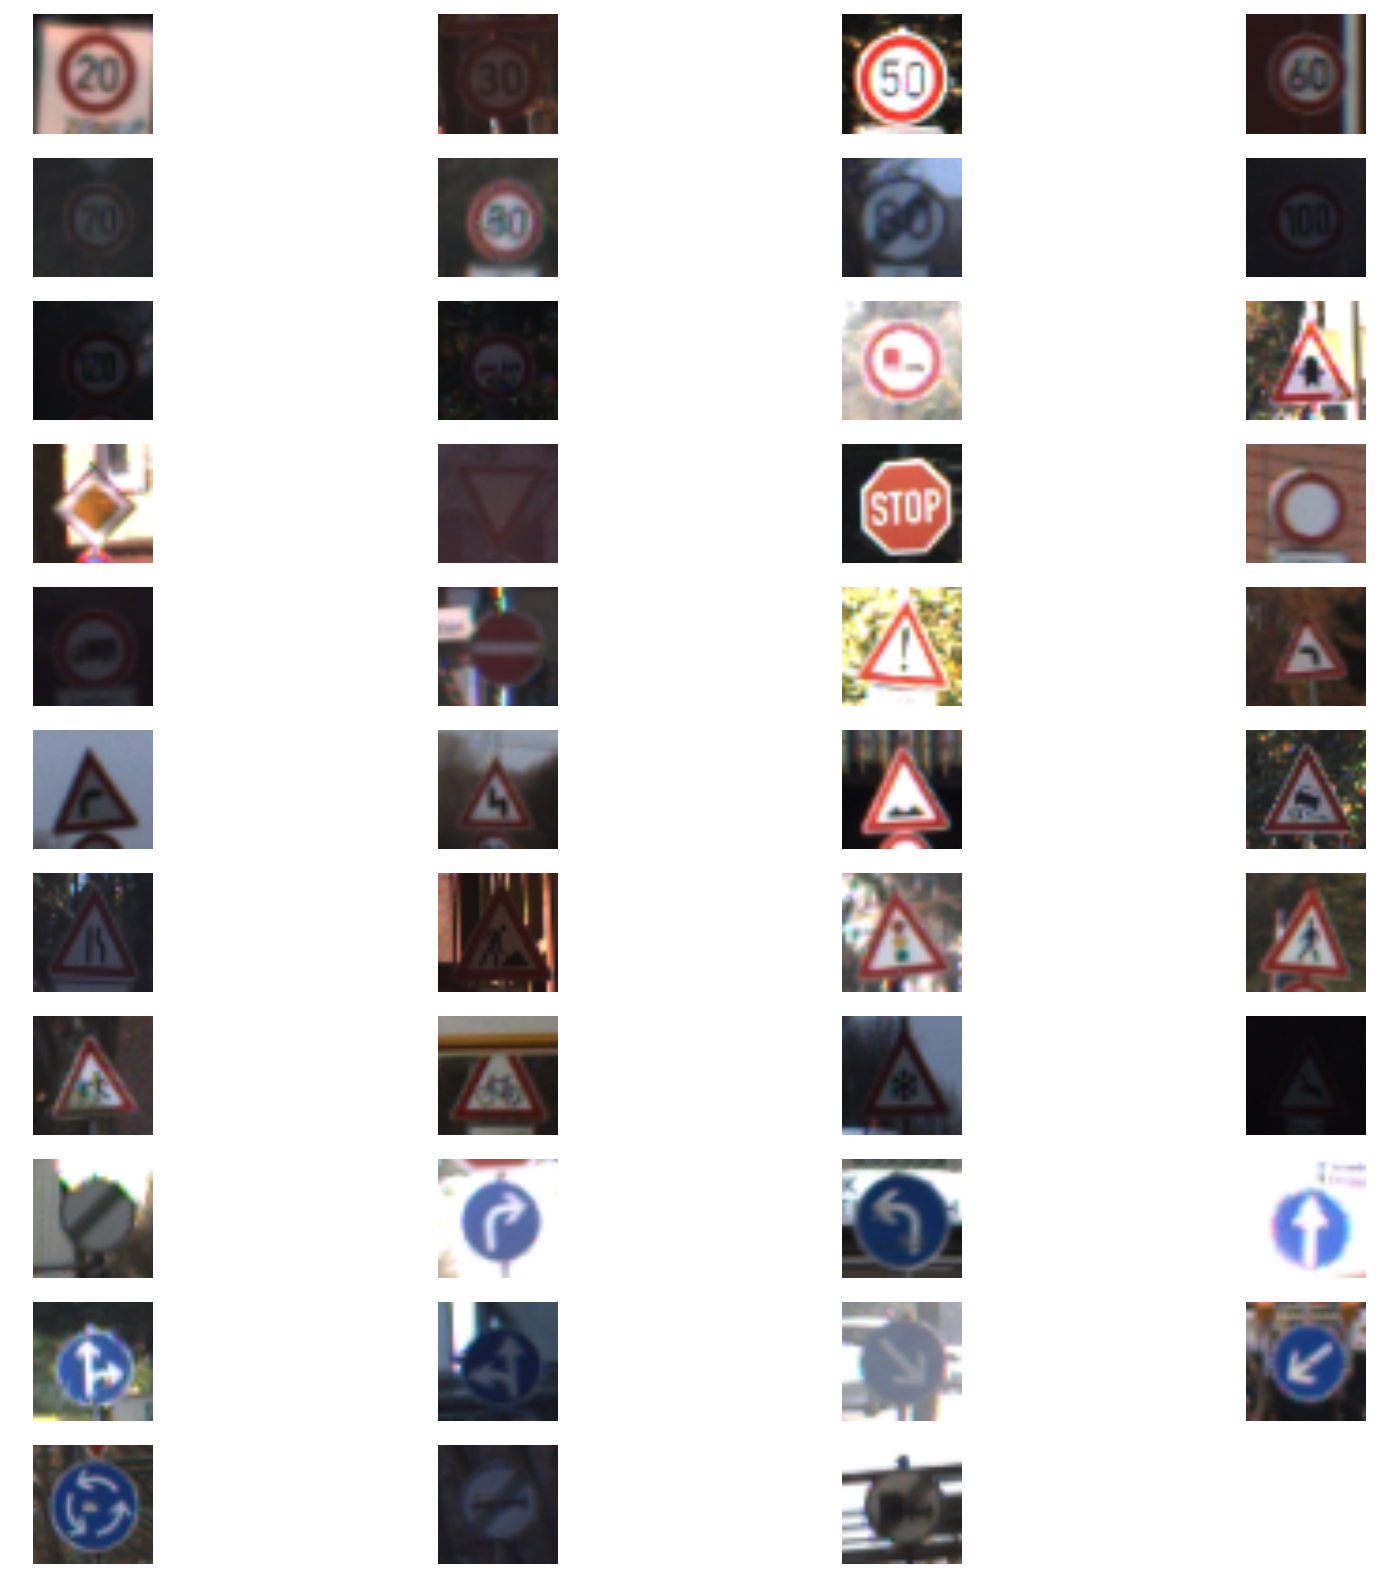

In [4]:
# show an expample of each sign
plt.figure(figsize=(20, 20))
for i in range(43):
    plt.subplot(11, 4, i+1)
    j = np.where(y_train==i)[0][100]
    plt.imshow(X_train[j])
    plt.axis('off')
plt.show()

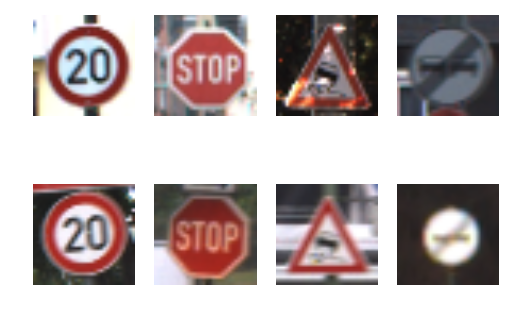

In [5]:
p1 = plt.subplot(2, 4, 1)
p2 = plt.subplot(2, 4, 2)
p3 = plt.subplot(2, 4, 3)
p4 = plt.subplot(2, 4, 4)
p5 = plt.subplot(2, 4, 5)
p6 = plt.subplot(2, 4, 6)
p7 = plt.subplot(2, 4, 7)
p8 = plt.subplot(2, 4, 8)
p1.imshow(X_train[127])
p1.axis('off')
p2.imshow(X_train[22342])
p2.axis('off')
p3.imshow(X_train[27773])
p3.axis('off')
p4.imshow(X_train[38783])
p4.axis('off')
p5.imshow(X_test[6639])
p5.axis('off')
p6.imshow(X_test[7274])
p6.axis('off')
p7.imshow(X_test[8673])
p7.axis('off')
p8.imshow(X_test[147])
p8.axis('off')
plt.show()      

In [6]:
label_count = [0 for _ in range(43)]
label_dict = {}
for i in range(43):
    label_count[i] = np.sum(y_train==i)
    label_dict[i] = np.where(y_train==i)
print(label_count)

[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]


In [7]:
test_label_count = [0 for _ in range(43)]
test_label_dict = {}
for i in range(43):
    test_label_count[i] = np.sum(y_test==i)
    test_label_dict[i] = np.where(y_test==i)
print(test_label_count)

[60, 720, 750, 450, 660, 630, 150, 450, 450, 480, 660, 420, 690, 720, 270, 210, 150, 360, 390, 60, 90, 90, 120, 150, 90, 480, 180, 60, 150, 90, 150, 270, 60, 210, 120, 390, 120, 60, 690, 90, 90, 60, 90]


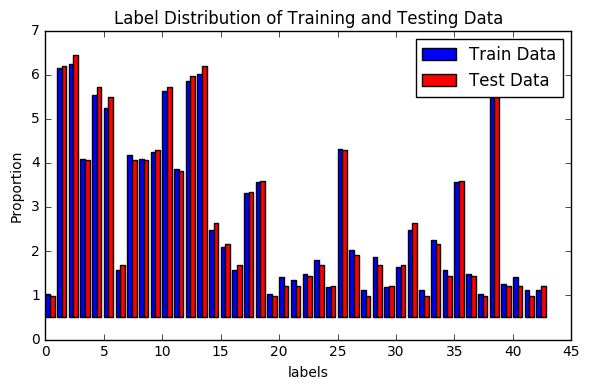

In [8]:
train_distri = np.array(label_count) / np.sum(label_count) * 100
test_distri = np.array(test_label_count) / np.sum(test_label_count) * 100
index = np.array([i for i in range(43)])
train_bar = plt.bar(index, train_distri, 0.4, 0.5, color='b',label='Train Data') 
test_bar = plt.bar(index+0.4, test_distri, 0.4, 0.5, color='r', label='Test Data')
plt.xlabel('labels')  
plt.ylabel('Proportion')  
plt.title('Label Distribution of Training and Testing Data') 
plt.legend() 
plt.tight_layout()
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
def normalization(images):
    images = images.astype(np.float32)
    def normalizer(data):
        res = (data - np.mean(data)) / np.std(data)
        return res
    images[:, :, :, 0] = normalizer(images[:, :, :, 0])
    images[:, :, :, 1] = normalizer(images[:, :, :, 1])
    images[:, :, :, 2] = normalizer(images[:, :, :, 2])
    return images
tr_num = len(X_train) # record how many training images
images = np.vstack([X_train, X_test])
labels = np.hstack([y_train, y_test])
images = normalization(images)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Each channel of data was substracted by its mean so that it was zero-centered. Then, the data was divided by its standard deviation respectively. 
The color data of every channel possiblely varies much from each other, however, the weights of the model will be only updated by the same (learning_rate * gradients), and in this case, it would be very possible that the updating is too much in one channel while too little for other channel. By applying the normalization method mentioned above, the value of each channel can be fixed in the same range. 

### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.


In [10]:
from sklearn.utils import shuffle

images, labels = shuffle(images, labels)
n1 = int(len(labels) * 0.6)
n2 = int(len(labels) * 0.8)
X_train = images[:n1]
y_train = labels[:n1]
X_val = images[n1:n2]
y_val = labels[n1:n2]
X_test = images[n2:]
y_test = labels[n2:]

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

At my first approach, I use the given training data and testing data (randomly separate approximately 20% of training data as validation data) directly to train the model. Interetingly, I got 99.5% training accuracy, 98.8% validation accuracy, but 90.0% testing accuracy. I think it's not overfitting since the narrow gap between training and validation. I plotted the label distribution between training and testing above, and the difference is not significant. Thus, I guess it is because the training data cannot generalize the testing data well. Consequently, I combine the training and testing data, shuffle them and re-split them for training (60%), validation (20%) and testing (20%).

Considering some labels are much more than others, I tried to generate new data to balance them by rotating， changing brightness etc. But this wasn't of any help. This lead to much lower accuracy (95% compared to 99.41% testing accuracy without additional data), I think this might be caused by my poor data generation method. However, I think my model already works very well, I abandoned additional data.

In [11]:
def fit_batches(images, labels, batch_size):
    num_batches = int(len(labels)/batch_size) + 1
    res_images = []
    res_labels = []
    for i in range(num_batches):
        j = i * batch_size
        k = (i + 1) * batch_size
        if k > len(labels):
            k = len(labels)
            j = k - batch_size
        res_images.append(images[j:k])
        res_labels.append(labels[j:k])
    return np.array(res_images), np.array(res_labels)

In [12]:
# hyperparameters here
class Config:
    learning_rate = 1e-5
    wd = 1e-5
    dropout = 0.5
    batch_size = 512
    epochs = 4000
    interval = 10
    logs_path = './save'

In [13]:
import tensorflow as tf
import time, sys, os
from sklearn import metrics

    
class TSR:
    def __init__(self, config):
        self.config = config
        self.load_data()
        self.add_placeholders()
        self.add_model()
        self.add_loss_and_train_op()
        self.add_predict_op()
        self.init_op = tf.global_variables_initializer()
        self.saver = tf.train.Saver()
        
    def load_data(self):
        self.X_train, self.y_train = fit_batches(X_train, y_train, self.config.batch_size)
        self.X_val, self.y_val = fit_batches(X_val, y_val, self.config.batch_size)
        self.X_test, self.y_test = fit_batches(X_test, y_test, self.config.batch_size)
        
    def add_placeholders(self):
        self.inputs = tf.placeholder(tf.float32)
        self.labels = tf.placeholder(tf.int32)
        self.dropout = tf.placeholder(tf.float32)
    
    def create_feed_dict(self, images, labels=None, dropout=1.):
        feed = {self.inputs: images,
                self.dropout: dropout}
        if labels is not None:
            feed[self.labels] = labels
        return feed
    
    def add_model(self):
        x = self.inputs
        dp = self.dropout
        W1 = tf.get_variable('W1', (3, 3, 3, 32))
        b1 = tf.get_variable('b1', (32,))
        conv1 = conv(x, W1, b1)
        relu1 = tf.nn.relu(conv1)

        x2 = tf.nn.dropout(relu1, dp)
        W2 = tf.get_variable('W2', (3, 3, 32, 32))
        b2 = tf.get_variable('b2', (32,))
        conv2 = conv(x2, W2, b2)
        relu2 = tf.nn.relu(conv2)
        pool2 = tf.nn.max_pool(relu2, ksize=(1, 2, 2, 1), 
                strides=(1, 2, 2, 1), padding='SAME')

        x3 = tf.nn.dropout(pool2, dp)
        W3 = tf.get_variable('W3', (3, 3, 32, 32))
        b3 = tf.get_variable('b3', (32,))
        conv3 = conv(x3, W3, b3)
        relu3 = tf.nn.relu(conv3)

        x4 = tf.nn.dropout(relu3, dp)
        W4 = tf.get_variable('W4', (3, 3, 32, 32))
        b4 = tf.get_variable('b4', (32,))
        conv4 = conv(x4, W4, b4)
        relu4 = tf.nn.relu(conv4)
        pool4 = tf.nn.max_pool(relu4, ksize=(1, 2, 2, 1), 
                strides=(1, 2, 2, 1), padding='SAME')

        x5 = tf.nn.dropout(pool4, dp)
        W5 = tf.get_variable('W5', (3, 3, 32, 32))
        b5 = tf.get_variable('b5', (32,))
        conv5 = conv(x5, W5, b5)
        relu5 = tf.nn.relu(conv5)

        x6_1 = tf.reshape(relu3, (-1, 8192))
        x6_2 = tf.reshape(relu5, (-1, 2048))
        x6 = tf.concat(1, [x6_1, x6_2])
        W6 = tf.get_variable('W6', (10240, 10240))
        b6 = tf.get_variable('b6', (10240,))
        fc6 = tf.matmul(x6, W6) + b6
        relu6 = tf.nn.relu(fc6)

        x7 = tf.nn.dropout(relu6, dp)
        W7 = tf.get_variable('W9', (10240, 43))
        b7 = tf.get_variable('b9', (43,))
        fc7 = tf.matmul(x7, W7) + b7
        self.logits = tf.nn.softmax(fc7)

    def add_loss_and_train_op(self):
        loss = tf.nn.sparse_softmax_cross_entropy_with_logits(
                self.logits, self.labels)
        tvars = tf.trainable_variables()
        l2_penalty = tf.add_n([tf.nn.l2_loss(var) for var in tvars])
        loss = tf.reduce_mean(loss)
        self.loss = loss + self.config.wd * l2_penalty
        optimizer = tf.train.AdamOptimizer(self.config.learning_rate)
        self.train_op = optimizer.minimize(self.loss)
        tf.scalar_summary('loss', loss)
        self.summary_op = tf.merge_all_summaries()

    def add_predict_op(self):
        self.prediction = tf.argmax(self.logits, 1)
        
    def run_epoch(self, sess, load=None, save=None):
        if load:
            ckpt = tf.train.get_checkpoint_state(load)
            self.saver.restore(sess, ckpt.model_checkpoint_path)
        else:
            sess.run(self.init_op)
        start_time = time.time()
        best_loss = float('inf')
        if not os.path.exists('./save'):
            os.makedirs('./save')
        writer = tf.train.SummaryWriter(self.config.logs_path, graph=tf.get_default_graph())
        for epoch in range(self.config.epochs):
            total_loss = 0
            X_train, y_train = shuffle(self.X_train, self.y_train)
            for i in range(X_train.shape[0]):
                X, y = shuffle(X_train[i], y_train[i])
                feed = self.create_feed_dict(X, y, self.config.dropout)
                loss, _, summary = sess.run([self.loss, self.train_op, self.summary_op], 
                                            feed_dict=feed)
                total_loss += loss
                sys.stdout.write('\r')
                sys.stdout.write('\rEpoch {:>3}, step {:>4}, time {:8.2f}, loss {:.4f}'.format(
                    epoch+1, i, time.time()-start_time, total_loss/(i+1)))
                sys.stdout.flush()
            writer.add_summary(summary, epoch*i+1)
            if (epoch+1) % self.config.interval == 0:
                self.evaluation(sess)
                if best_loss > total_loss/(i+1):
                    best_loss = total_loss/(i+1)
                    self.saver.save(sess, './save/weight_{}'.format(epoch))
            
    def evaluation(self, sess, load=None):
        if load:
            ckpt = tf.train.get_checkpoint_state(load)
            self.saver.restore(sess, ckpt.model_checkpoint_path)
        train_preds = []
        for i in range(self.X_train.shape[0]):
            feed = self.create_feed_dict(self.X_train[i])
            pred = sess.run(self.prediction, feed_dict=feed)
            train_preds.append(pred)
        train_preds = np.vstack(train_preds).flatten()
        train_labels = self.y_train.flatten()
        train_acc = metrics.accuracy_score(train_labels, train_preds)
        
        val_preds = []
        for i in range(self.X_val.shape[0]):
            feed = self.create_feed_dict(self.X_val[i])
            pred = sess.run(self.prediction, feed_dict=feed)
            val_preds.append(pred)
        val_preds = np.vstack(val_preds).flatten()
        val_labels = self.y_val.flatten()
        val_acc = metrics.accuracy_score(val_labels, val_preds)
        test_preds = []
        for i in range(self.X_test.shape[0]):
            feed = self.create_feed_dict(self.X_test[i])
            pred = sess.run(self.prediction, feed_dict=feed)
            test_preds.append(pred)
        test_preds = np.vstack(test_preds).flatten()
        test_labels = self.y_test.flatten()
        test_acc = metrics.accuracy_score(test_labels, test_preds)
        print()
        print('Train {:.4f}, Val {:.4f}, Test {:.4f}'.format(train_acc, val_acc, test_acc))
        
    def predict(self, image, sess, load):
        ckpt = tf.train.get_checkpoint_state(load)
        self.saver.restore(sess, ckpt.model_checkpoint_path)
        feed = self.create_feed_dict(image)
        pred = sess.run(self.prediction, feed_dict=feed)
        return pred
    
    def get_probabilities(self, image, sess, load):
        ckpt = tf.train.get_checkpoint_state(load)
        self.saver.restore(sess, ckpt.model_checkpoint_path)
        feed = self.create_feed_dict(image)
        probs = sess.run(self.logits, feed_dict=feed)
        return probs
    
def conv(x, W, b, strides=(1, 1, 1, 1), padding='SAME'):
    y = tf.nn.conv2d(x, W, strides=strides, padding=padding)
    y = tf.nn.bias_add(y, b)
    return y

In [14]:
cfg = Config()
tsr = TSR(cfg)

In [15]:
with tf.Session() as sess:
    # tsr.run_epoch(sess)
    tsr.evaluation(sess, load='./save')


Train 0.9977, Val 0.9986, Test 0.9980


In [16]:
# Here is the training history.
losses = []
train_acc = []
val_acc = []
test_acc = []
with open('training_records', 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        if (i+1) % 40 == 0:
            print(lines[i-1].strip())
            print(lines[i].strip())
        line = lines[i].strip().split()
        if 'loss' in line:
            losses.append(float(line[-1]))
        elif 'Train' in line:
            train_acc.append(float(line[1][:-1]))
            val_acc.append(float(line[3][:-1]))
            test_acc.append(float(line[5][:-1]))

Epoch 200, step   60, time  2139.41, loss 3.4057
Train 0.4579, Val 0.4505, Test 0.4495
Epoch 400, step   60, time  4247.31, loss 3.1356
Train 0.7382, Val 0.7170, Test 0.7238
Epoch 600, step   60, time  6359.60, loss 3.0322
Train 0.8362, Val 0.8181, Test 0.8222
Epoch 800, step   60, time  8475.13, loss 2.9449
Train 0.9144, Val 0.9023, Test 0.9009
Epoch 1000, step   60, time 10587.01, loss 2.8945
Train 0.9537, Val 0.9449, Test 0.9422
Epoch 1200, step   60, time 12700.00, loss 2.8765
Train 0.9617, Val 0.9541, Test 0.9526
Epoch 1400, step   60, time 14815.47, loss 2.8576
Train 0.9725, Val 0.9664, Test 0.9631
Epoch 1600, step   60, time 16925.20, loss 2.8508
Train 0.9726, Val 0.9666, Test 0.9635
Epoch 1800, step   60, time 19034.78, loss 2.8299
Train 0.9887, Val 0.9836, Test 0.9805
Epoch 2000, step   60, time 21140.81, loss 2.8258
Train 0.9889, Val 0.9834, Test 0.9812
Epoch 2200, step   60, time 23243.94, loss 2.8176
Train 0.9942, Val 0.9878, Test 0.9879
Epoch 2400, step   60, time 25338.71

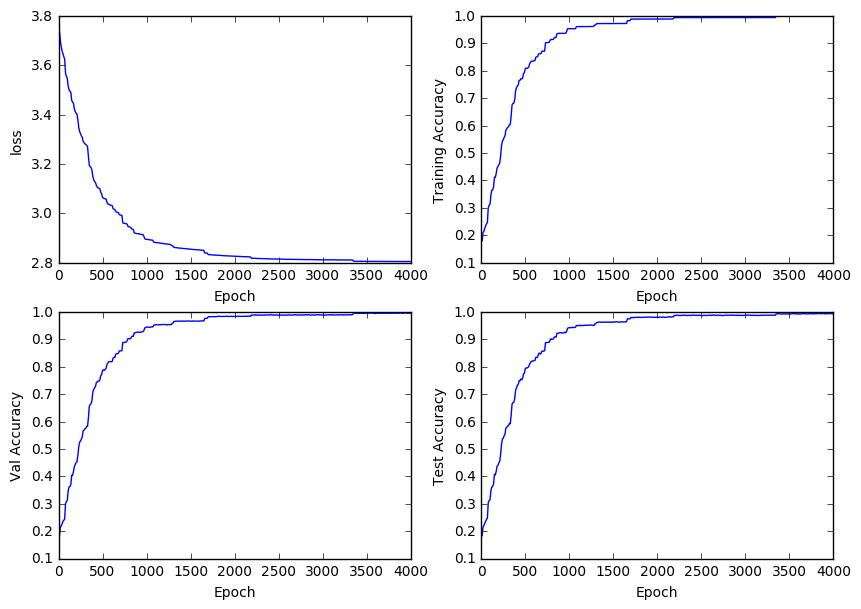

In [17]:
epochs = [(i+1)*10 for i in range(400)]
plt.figure(figsize=(10, 7))
plt.subplot(2, 2, 1)
plt.plot(epochs, losses)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.subplot(2, 2, 2)
plt.plot(epochs, train_acc)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.subplot(2, 2, 3)
plt.plot(epochs, val_acc)
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.subplot(2, 2, 4)
plt.plot(epochs, test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')

In [18]:
# Considering the unbalance of signs, here I check individual accuracy for each sign.
for i in range(43):
    inds = np.where(y_test==i)
    X = X_test[inds]
    y = y_test[inds]
    with tf.Session() as sess:
        preds = tsr.predict(X, sess, './save')
        acc = metrics.accuracy_score(y, preds)
    print('sign{:>2} Accuracy: {:.4f}'.format(i, acc))

sign 0 Accuracy: 1.0000
sign 1 Accuracy: 1.0000
sign 2 Accuracy: 1.0000
sign 3 Accuracy: 1.0000
sign 4 Accuracy: 1.0000
sign 5 Accuracy: 0.9945
sign 6 Accuracy: 1.0000
sign 7 Accuracy: 0.9950
sign 8 Accuracy: 1.0000
sign 9 Accuracy: 0.9944
sign10 Accuracy: 1.0000
sign11 Accuracy: 0.9968
sign12 Accuracy: 0.9982
sign13 Accuracy: 0.9983
sign14 Accuracy: 1.0000
sign15 Accuracy: 1.0000
sign16 Accuracy: 1.0000
sign17 Accuracy: 1.0000
sign18 Accuracy: 0.9841
sign19 Accuracy: 1.0000
sign20 Accuracy: 1.0000
sign21 Accuracy: 1.0000
sign22 Accuracy: 1.0000
sign23 Accuracy: 0.9912
sign24 Accuracy: 1.0000
sign25 Accuracy: 1.0000
sign26 Accuracy: 0.9864
sign27 Accuracy: 1.0000
sign28 Accuracy: 1.0000
sign29 Accuracy: 1.0000
sign30 Accuracy: 1.0000
sign31 Accuracy: 1.0000
sign32 Accuracy: 1.0000
sign33 Accuracy: 1.0000
sign34 Accuracy: 1.0000
sign35 Accuracy: 1.0000
sign36 Accuracy: 0.9898
sign37 Accuracy: 1.0000
sign38 Accuracy: 1.0000
sign39 Accuracy: 1.0000
sign40 Accuracy: 1.0000
sign41 Accuracy:

The results showed that most sign had very good accuracy (above 99%). The lowest sign still got 98%.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

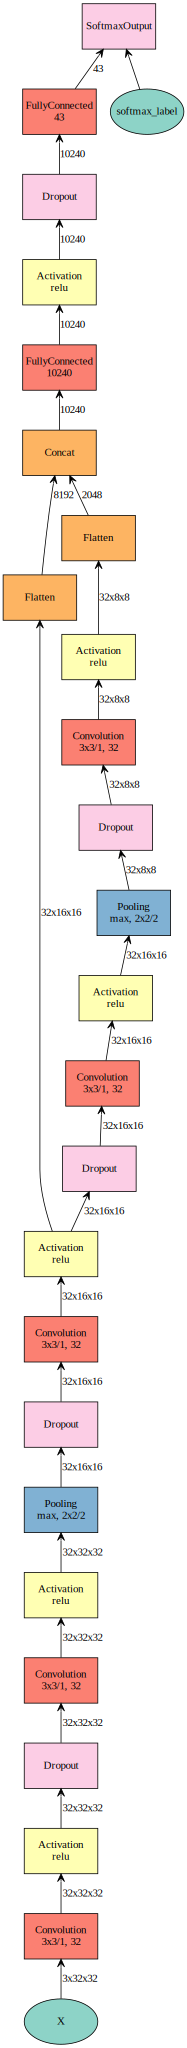

In [19]:
"""
Reference: 'Traffic Sign Recognition with Multi-Scale Convolutional Networks'.
I think the computation graph drew by tensorboard is too detailed and complicated. 
Here I use MxNet to draw the architecture instead, and the details of the model are clearly described
in the graph.
"""
import mxnet as mx

x = mx.sym.Variable('X')
conv1 = mx.sym.Convolution(data=x, kernel=(3, 3), pad=(1, 1), num_filter=32, name='conv1')
relu1 = mx.sym.Activation(data=conv1, act_type='relu', name='relu1')

dp2 = mx.sym.Dropout(data=relu1, p=0.5, name='dp2')
conv2 = mx.sym.Convolution(data=dp2, kernel=(3, 3), pad=(1, 1), num_filter=32, name='conv2')
relu2 = mx.sym.Activation(data=conv2, act_type='relu', name='relu2')
pool2 = mx.sym.Pooling(data=relu2, pool_type='max', kernel=(2, 2), stride=(2, 2), name='pool2')

dp3 = mx.sym.Dropout(data=pool2, p=0.5, name='dp3')
conv3 = mx.sym.Convolution(data=dp3, kernel=(3, 3), pad=(1, 1), num_filter=32, name='conv3')
relu3 = mx.sym.Activation(data=conv3, act_type='relu', name='relu3')
flt3 = mx.sym.Flatten(data=relu3, name='flt3')

dp4 = mx.sym.Dropout(data=relu3, p=0.5, name='dp4')
conv4 = mx.sym.Convolution(data=dp4, kernel=(3, 3), pad=(1, 1), num_filter=32, name='conv4')
relu4 = mx.sym.Activation(data=conv4, act_type='relu', name='relu4')
pool4 = mx.sym.Pooling(data=relu4, pool_type='max', kernel=(2, 2), stride=(2, 2), name='pool4')

dp5 = mx.sym.Dropout(data=pool4, p=0.5, name='dp5')
conv5 = mx.sym.Convolution(data=dp5, kernel=(3, 3), pad=(1, 1), num_filter=32, name='conv5')
relu5 = mx.sym.Activation(data=conv5, act_type='relu', name='relu5')
flt5 = mx.sym.Flatten(data=relu5, name='flt5')

concat6 = mx.sym.Concat(flt3, flt5, dim=1, name='concat6')
fc6 = mx.sym.FullyConnected(data=concat6, num_hidden=10240, name='fc6')
relu6 = mx.sym.Activation(data=fc6, act_type='relu', name='relu6')

dp7 = mx.sym.Dropout(data=relu6, name='dp7')
fc7 = mx.sym.FullyConnected(data=dp7, num_hidden=43, name='fc7')

mlp = mx.sym.SoftmaxOutput(data=fc7, name='softmax')

shape = {'X': (512, 3, 32, 32)}

mx.viz.plot_network(symbol=mlp, shape=shape)

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

optimizer: Adam

batch size: 512

epochs: 4000

learning_rate: 1e-5

weight decay: 1e-5

dropout: 0.5

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I designed the architecture according to the given reference. I tuned parameters (learning rate, weight decay) so that the model could convergence and it gave me quite good training accuracy and validation accuracy but much lower testing accuracy. Considering the big gap between val accuracy and test accuracy, I reorganized the data for training validation and testing. And this approach provided me very good result. I also tested dropout which provided me with better accuracy. After that, I also trained several different architectures to compare with it. 

The second one was quite similar to this one but without using intermediate features of the third convolution layer for classification. 

The third one contained 4 inception units after two convolution layer, and the features were fed directly to two layer fullyconnected classifier.

The fourth was quite similar to the previous one but with using intermediate features of the second inception for classification.

The results showed that inception units didn't work well in this problem. And intermediate features are quite essential for a good result.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

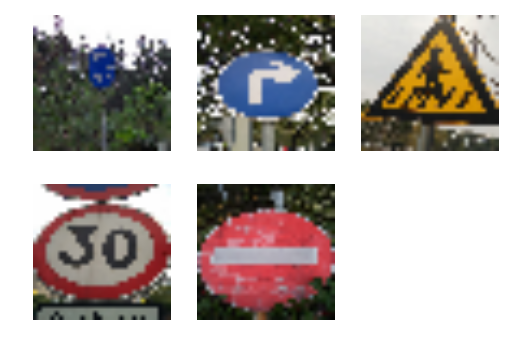

In [30]:
import cv2
img_data = []
for path, _, imgs in os.walk('./imgs'):
    for img in imgs:
        img = mpimg.imread(os.path.join(path, img))
        img = cv2.resize(img, (32, 32))
        img_data.append(img)
for i in range(len(img_data)):
    plt.subplot(2, 3, i+1)
    plt.imshow(img_data[i])
    plt.axis('off')
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

The small proportion of the sign in the image might make classification difficult. 

In [31]:
with tf.Session() as sess:
    img_data = normalization(np.array(img_data))
    preds = tsr.predict(img_data, sess, './save')

In [32]:
import csv
sign_dict = {}
with open('signnames.csv', 'r') as f:
    first_line = True
    for line in csv.reader(f):
        if first_line:
            first_line = False
        else:
            sign_dict[int(line[0])] = line[1]
print('Predictions:')
for i in range(len(preds)):
    print('Image {}: {}'.format(i+1, sign_dict[preds[i]]))

Predictions:
Image 1: Roundabout mandatory
Image 2: Turn right ahead
Image 3: Priority road
Image 4: Speed limit (30km/h)
Image 5: No entry


All predictions seems correct given the above images.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [33]:
with tf.Session() as sess:
    probs = tsr.get_probabilities(img_data, sess, './save')
    probs = (np.sort(probs*(-1), axis=1)) * -1
print(probs)

[[  5.55106997e-01   1.24827661e-01   9.36500207e-02   5.48914522e-02
    5.08932993e-02   3.21259163e-02   2.45324653e-02   2.11959891e-02
    1.48480320e-02   7.97430333e-03   5.67541691e-03   4.50322218e-03
    4.30393964e-03   2.35497183e-03   1.72275910e-03   2.52239639e-04
    2.37680317e-04   1.61417731e-04   1.50662047e-04   1.48111547e-04
    1.44861682e-04   1.11946516e-04   3.89949455e-05   3.13241726e-05
    2.54005699e-05   2.46992440e-05   2.14413176e-05   1.29013360e-05
    1.16861493e-05   5.08617268e-06   4.95579297e-06   3.25979818e-06
    3.01678483e-06   3.00083934e-06   4.08443697e-07   2.95522113e-07
    5.96213567e-08   2.33461002e-08   1.35369396e-08   1.24285453e-08
    1.23364128e-08   9.46571266e-09   3.84007048e-09]
 [  9.99999523e-01   4.53047079e-07   5.58345731e-11   4.04154358e-12
    1.10191630e-12   1.51896955e-13   3.28539076e-14   9.32024233e-15
    6.96112725e-15   3.71364952e-15   2.53596741e-16   2.56270017e-17
    1.64440362e-17   1.25912589e-17 

In [44]:
# show the top 3 predictions for image 1 and 4. 
with tf.Session() as sess:
    prob0 = tsr.get_probabilities([img_data[0]], sess, './save')[0]
    prob3 = tsr.get_probabilities([img_data[3]], sess, './save')[0]
    inds0 = np.where(prob0>0.06)[0]
    inds3 = np.where(prob3>0.04)[0]
    p0 = prob0[prob0>0.06]
    p3 = prob3[prob3>0.04]
    print('Image1: {:>2}: {:.4f}; {:>2}: {:.4f}; {:>2}: {:.4f}'.format(inds0[0], p0[0], inds0[1], p0[1], inds0[2], p0[2]))
    print()
    print('Image4: {:>2}: {:.4f}; {:>2}: {:.4f}; {:>2}: {:.4f}'.format(inds3[0], p3[0], inds3[1], p3[1], inds3[2], p3[2]))

Image1: 13: 0.1248; 21: 0.0937; 40: 0.5551

Image4:  1: 0.7305;  3: 0.1614; 28: 0.0470


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The model is quite certain for most images given above, particularly for image2, 3, 5, whose probs are above 98%.

The uncertainty in image1 probably caused by the small proportion of the sign in the image.

In image4, the probability of the correct sign is relatively lower than the probabilities in other images, but it is still quite certain. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.